In [6]:
# Import required libraries

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

### ***Load & Explore Dataset***

In [7]:
# Load data
data = pd.read_csv(r'C:\Users\spand\Projects\LABMENTIX_PROJECTS\EMI_Prediction\Data\Raw\emi_prediction_dataset.csv', low_memory=False)

# View the top 5 rows of the dataset
data.head()

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,38,Female,Married,Professional,82600.0,Private,0.9,Mid-size,Rented,20000.0,...,Yes,23700.0,660.0,303200.0,70200.0,Personal Loan EMI,850000.0,15,Not_Eligible,500.0
1,38,Female,Married,Graduate,21500.0,Private,7.0,MNC,Family,0.0,...,Yes,4100.0,714.0,92500.0,26900.0,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0
2,38,Male,Married,Professional,86100.0,Private,5.8,Startup,Own,0.0,...,No,0.0,650.0,672100.0,324200.0,Education EMI,306000.0,16,Eligible,27775.0
3,58,Female,Married,High School,66800.0,Private,2.2,Mid-size,Own,0.0,...,No,0.0,685.0,440900.0,178100.0,Vehicle EMI,304000.0,83,Eligible,16170.0
4,48,Female,Married,Professional,57300.0,Private,3.4,Mid-size,Family,0.0,...,No,0.0,770.0,97300.0,28200.0,Home Appliances EMI,252000.0,7,Not_Eligible,500.0


In [8]:
# View the bottom 5 rows of the dataset
data.tail()

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
404795,27,Male,Married,Graduate,32400.0,Private,5.0,Large Indian,Rented,10400.0,...,No,0.0,649.0,62000.0,32600.0,Personal Loan EMI,506000.0,47,Not_Eligible,500.0
404796,38,Male,Married,Post Graduate,49200.0,Private,1.9,MNC,Own,0.0,...,No,0.0,712.0,142200.0,38100.0,Personal Loan EMI,708000.0,33,Not_Eligible,5200.0
404797,32,Male,Single,Graduate,25700.0,Private,3.2,MNC,Rented,6300.0,...,No,0.0,676.0,191600.0,39700.0,Home Appliances EMI,93000.0,21,High_Risk,5665.0
404798,48,Male,Married,Graduate,47200.0,Private,3.0,MNC,Own,0.0,...,No,0.0,784.0,170400.0,45600.0,Home Appliances EMI,144000.0,36,Eligible,14460.0
404799,38,FEMALE,Married,Graduate,34900.0,Private,1.2,MNC,Family,0.0,...,No,0.0,641.0,214400.0,99400.0,Home Appliances EMI,77000.0,35,Eligible,8756.0


In [9]:
# Dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     404800 non-null  object 
 1   gender                  404800 non-null  object 
 2   marital_status          404800 non-null  object 
 3   education               402396 non-null  object 
 4   monthly_salary          404800 non-null  object 
 5   employment_type         404800 non-null  object 
 6   years_of_employment     404800 non-null  float64
 7   company_type            404800 non-null  object 
 8   house_type              404800 non-null  object 
 9   monthly_rent            402374 non-null  float64
 10  family_size             404800 non-null  int64  
 11  dependents              404800 non-null  int64  
 12  school_fees             404800 non-null  float64
 13  college_fees            404800 non-null  float64
 14  travel_expenses     

In [10]:
# Count of rows and columns in the dataset
print(f'No. of rows present in the dataset: {data.shape[0]}')
print(f'No. of columns present in the dataset: {data.shape[1]}')

No. of rows present in the dataset: 404800
No. of columns present in the dataset: 27


In [11]:
# View column names
data.columns

Index(['age', 'gender', 'marital_status', 'education', 'monthly_salary',
       'employment_type', 'years_of_employment', 'company_type', 'house_type',
       'monthly_rent', 'family_size', 'dependents', 'school_fees',
       'college_fees', 'travel_expenses', 'groceries_utilities',
       'other_monthly_expenses', 'existing_loans', 'current_emi_amount',
       'credit_score', 'bank_balance', 'emergency_fund', 'emi_scenario',
       'requested_amount', 'requested_tenure', 'emi_eligibility',
       'max_monthly_emi'],
      dtype='object')

In [12]:
# Check for duplicates 
print(f'No. of duplicate rows present in the dataset: {data.duplicated().sum()}')

No. of duplicate rows present in the dataset: 0


In [13]:
# Check for missing values
print("--- MISSING VALUES DATA ---\n")
missing = data.isnull().sum()
missing_percent = (missing / len(data)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Missing Percentage': missing_percent})
print(missing_df[missing_df['Missing Values'] > 0].sort_values('Missing Values', ascending=False))

--- MISSING VALUES DATA ---

                Missing Values  Missing Percentage
monthly_rent              2426            0.599308
bank_balance              2426            0.599308
credit_score              2420            0.597826
education                 2404            0.593874
emergency_fund            2351            0.580781


### ***Data Wrangling***

In [14]:
# Drop missing values since only a small percentage of data is missing
clean_df = data.copy()
clean_df = clean_df.dropna(axis=0) 

 # check if missing values were dropped
if clean_df.isnull().sum().sum() == 0:
    print("All missing values successfully handled.")
else:
    print("Some missing values still remain.")

All missing values successfully handled.


In [15]:
# Check unique values in each column
clean_df.nunique()

age                          30
gender                        8
marital_status                2
education                     4
monthly_salary            13361
employment_type               3
years_of_employment         356
company_type                  5
house_type                    3
monthly_rent               4325
family_size                   5
dependents                    5
school_fees                 132
college_fees                202
travel_expenses             283
groceries_utilities         542
other_monthly_expenses      373
existing_loans                2
current_emi_amount          506
credit_score                426
bank_balance              12191
emergency_fund             5467
emi_scenario                  5
requested_amount           1491
requested_tenure             82
emi_eligibility               3
max_monthly_emi           15293
dtype: int64

In [16]:
# Extract and convert to numeric dtype
clean_df['age'] = clean_df['age'].str.extract(r'([\d\.]+)')[0]
clean_df['age'] = pd.to_numeric(clean_df['age'], errors='coerce')
clean_df['age'].value_counts()

age
38.0    117010
32.0     97555
48.0     78065
27.0     57964
58.0     39195
37.0       476
39.0       464
33.0       432
31.0       385
49.0       314
47.0       292
28.0       223
26.0       207
59.0       176
57.0       159
Name: count, dtype: int64

In [17]:
# Convert all values into a single format
clean_df['gender'] = clean_df['gender'].str.upper().str[0]
clean_df['gender'].value_counts()

gender
M    235850
F    157070
Name: count, dtype: int64

In [18]:
# Extract and convert to numeric dtype
clean_df['bank_balance'] = clean_df['bank_balance'].str.extract(r'([\d\.]+)')[0]
clean_df['bank_balance'] = pd.to_numeric(clean_df['bank_balance'], errors='coerce')
clean_df['bank_balance'].value_counts()

bank_balance
115800.0     154
107700.0     153
86200.0      150
97800.0      147
101700.0     147
            ... 
1019000.0      1
1175200.0      1
1338400.0      1
936600.0       1
976900.0       1
Name: count, Length: 10577, dtype: int64

In [19]:
# Convert to numeric dtype
clean_df['monthly_salary'] = pd.to_numeric(clean_df['monthly_salary'], errors='coerce')
clean_df['monthly_salary'].value_counts()

monthly_salary
18000.0     4048
20000.0     2778
23400.0     2487
15000.0     2136
26000.0     1781
            ... 
26689.0        1
9894.0         1
7275.0         1
354655.0       1
495425.0       1
Name: count, Length: 12488, dtype: int64

In [20]:
# Checking for columns with NaN values after conversions
clean_df.isnull().sum()[clean_df.isnull().sum() > 0]

age                  3
monthly_salary    1931
bank_balance      1905
dtype: int64

In [21]:
clean_df = clean_df.dropna(axis=0) # Drop NaN values
clean_df.columns = clean_df.columns.str.replace(r"\s+", "_", regex=True).str.title() # Format column names using .title()

# View dataset info after basic cleaning and conversions
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389093 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Age                     389093 non-null  float64
 1   Gender                  389093 non-null  object 
 2   Marital_Status          389093 non-null  object 
 3   Education               389093 non-null  object 
 4   Monthly_Salary          389093 non-null  float64
 5   Employment_Type         389093 non-null  object 
 6   Years_Of_Employment     389093 non-null  float64
 7   Company_Type            389093 non-null  object 
 8   House_Type              389093 non-null  object 
 9   Monthly_Rent            389093 non-null  float64
 10  Family_Size             389093 non-null  int64  
 11  Dependents              389093 non-null  int64  
 12  School_Fees             389093 non-null  float64
 13  College_Fees            389093 non-null  float64
 14  Travel_Expenses         3

In [22]:
# Dataset shape before and after cleaning
print(f'Dataset shape before cleaning: {data.shape}')
print(f'Dataset shape after cleaning: {clean_df.shape}')

Dataset shape before cleaning: (404800, 27)
Dataset shape after cleaning: (389093, 27)


### ***Exploratory Data Analysis***

In [23]:
# Descriptive statistics of numerical variables
clean_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,389093.0,38.877685,9.299844,26.0,32.0,38.0,48.0,59.0
Monthly_Salary,389093.0,59503.468716,43378.915692,3967.0,35400.0,51700.0,73000.0,499970.0
Years_Of_Employment,389093.0,5.369391,6.084442,0.5,1.2,3.2,7.2,36.0
Monthly_Rent,389093.0,5825.840421,8644.294402,0.0,0.0,0.0,10600.0,80000.0
Family_Size,389093.0,2.940742,1.075108,1.0,2.0,3.0,4.0,5.0
Dependents,389093.0,1.940742,1.075108,0.0,1.0,2.0,3.0,4.0
School_Fees,389093.0,4626.402428,5061.491719,0.0,0.0,3100.0,9000.0,15000.0
College_Fees,389093.0,4067.675337,7320.431395,0.0,0.0,0.0,6500.0,25000.0
Travel_Expenses,389093.0,5686.975607,3392.480012,600.0,3200.0,4900.0,7400.0,30300.0
Groceries_Utilities,389093.0,12805.171771,6992.450307,1800.0,7700.0,11400.0,16400.0,71200.0


In [24]:
# Descriptive statistics of categorical variables
clean_df.describe(include=['O']).T

,count,unique,top,freq
Gender,389093,2,M,233532
Marital_Status,389093,2,Married,296005
Education,389093,4,Graduate,175086
Employment_Type,389093,3,Private,272106
Company_Type,389093,5,Large Indian,116391
House_Type,389093,3,Rented,155302
Existing_Loans,389093,2,No,233884
Emi_Scenario,389093,5,Home Appliances EMI,77881
Emi_Eligibility,389093,3,Not_Eligible,300790


In [25]:
# Split categorical and numerical columns
cat_cols = clean_df.select_dtypes(include=['O']).columns.tolist()
print(f'No of categorical columns: {len(cat_cols)} -> {cat_cols}')

num_cols = clean_df.select_dtypes(include=['number']).columns.tolist()
print(f'No of numerical columns: {len(num_cols)} -> {num_cols}')

No of categorical columns: 9 -> ['Gender', 'Marital_Status', 'Education', 'Employment_Type', 'Company_Type', 'House_Type', 'Existing_Loans', 'Emi_Scenario', 'Emi_Eligibility']
No of numerical columns: 18 -> ['Age', 'Monthly_Salary', 'Years_Of_Employment', 'Monthly_Rent', 'Family_Size', 'Dependents', 'School_Fees', 'College_Fees', 'Travel_Expenses', 'Groceries_Utilities', 'Other_Monthly_Expenses', 'Current_Emi_Amount', 'Credit_Score', 'Bank_Balance', 'Emergency_Fund', 'Requested_Amount', 'Requested_Tenure', 'Max_Monthly_Emi']


In [26]:
# Function to save EDA plots
def save_plot(filename, folder="", dpi=300, file_format="png"):
    """
    Save current matplotlib plot into Reports/Plots/<folder>/
    Works from notebook & scripts.
    """
    project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
    base_dir = os.path.join(project_root, "Reports", "Plots")
    output_dir = os.path.join(base_dir, folder) if folder else base_dir
    os.makedirs(output_dir, exist_ok=True)

    filepath = os.path.join(output_dir, f"{filename}.{file_format}")
    plt.savefig(filepath, dpi=dpi, bbox_inches="tight")

#### ***Univariate Analysis***

In [27]:
# Function to plot numerical features
def plot_numerical_feature(df, column):
    """
    Plots univariate analysis for numerical features:
    - Histogram + KDE & Boxplot
    - Summary stats + Skewness + Kurtosis
    """
    series = df[column].dropna()

    fig, axes = plt.subplots(1, 2, figsize=(20,5))

    # Histogram + KDE
    sns.histplot(series, kde=True, bins=30, ax=axes[0], color="skyblue", edgecolor="black")
    axes[0].set_title(f"Distribution of {column}")

    # Boxplot
    sns.boxplot(x=series, ax=axes[1], color="lightgreen")
    axes[1].set_title(f"Boxplot of {column}")

    # Stats + Skew + Kurtosis 
    stats = series.describe().to_dict() 
    stats["Skew"] = skew(series) 
    stats["Kurtosis"] = kurtosis(series) 
    textstr = "\n".join([f"{k}: {v:.2f}" for k, v in stats.items()]) 

    axes[1].text( 0.95, 0.95, textstr, transform=axes[1].transAxes, fontsize=10, 
                 verticalalignment="top", horizontalalignment="right", 
                 bbox=dict(boxstyle="round", facecolor="white", alpha=0.7))

    plt.tight_layout()
    save_plot(f"{column}_distribution", folder="Univariate")
    plt.show()

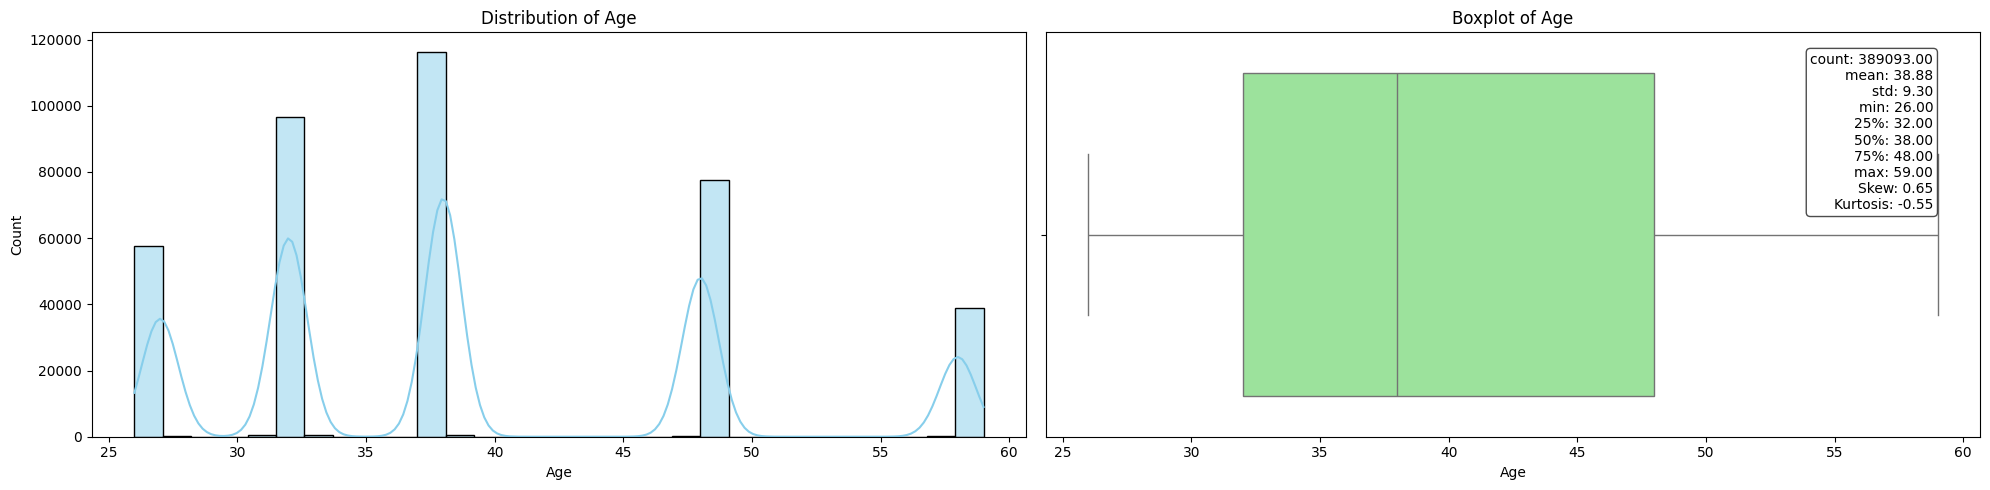

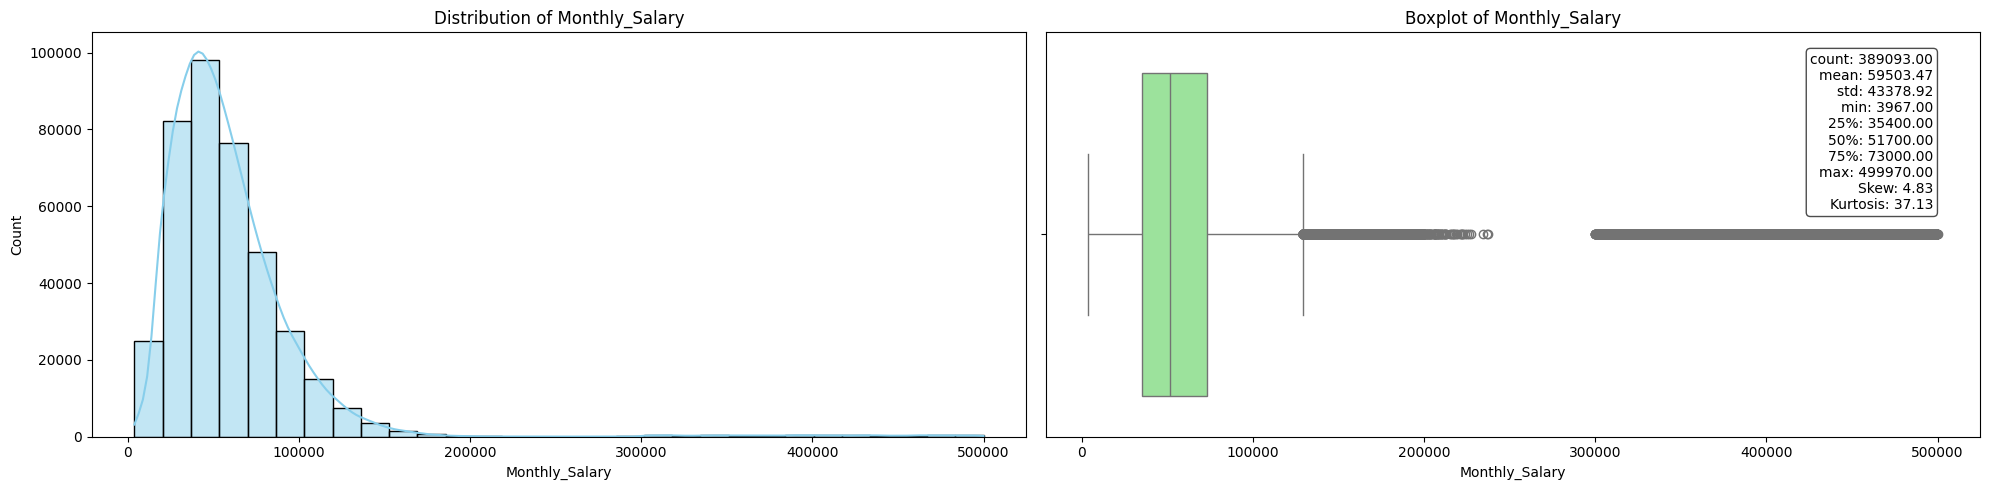

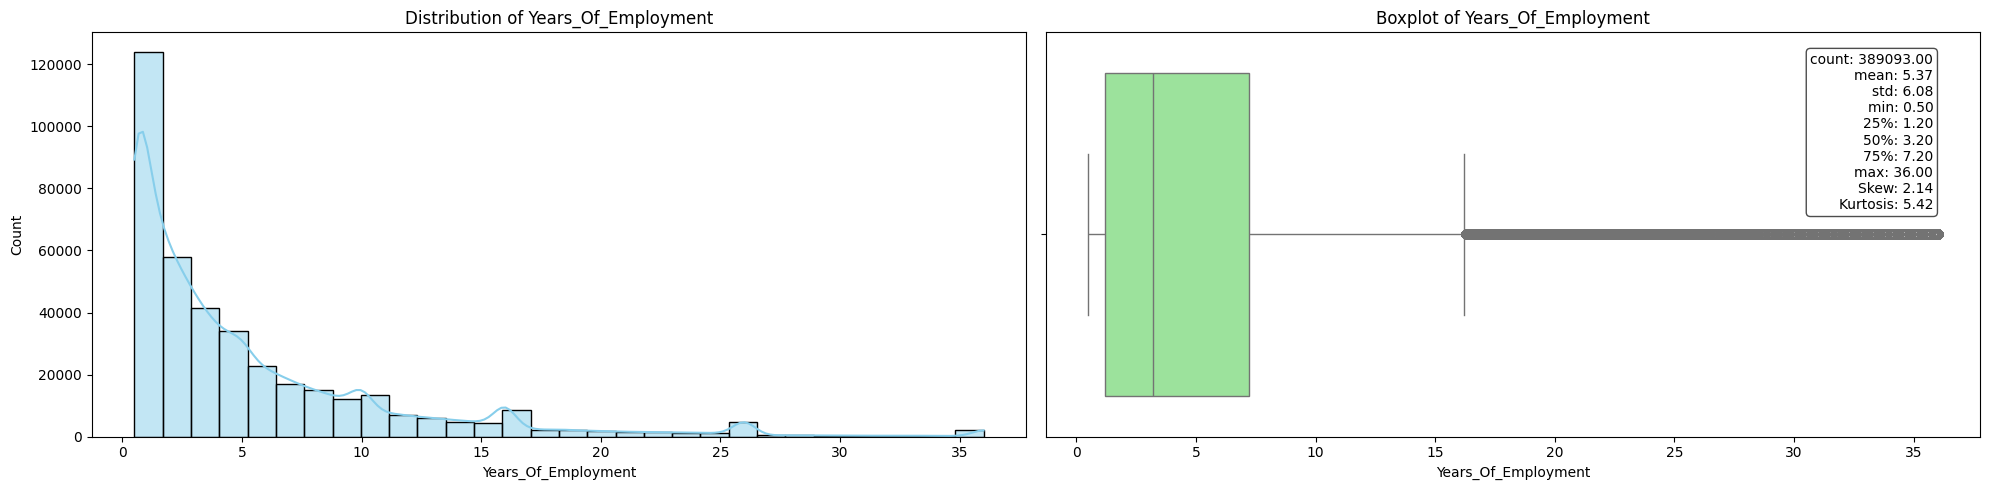

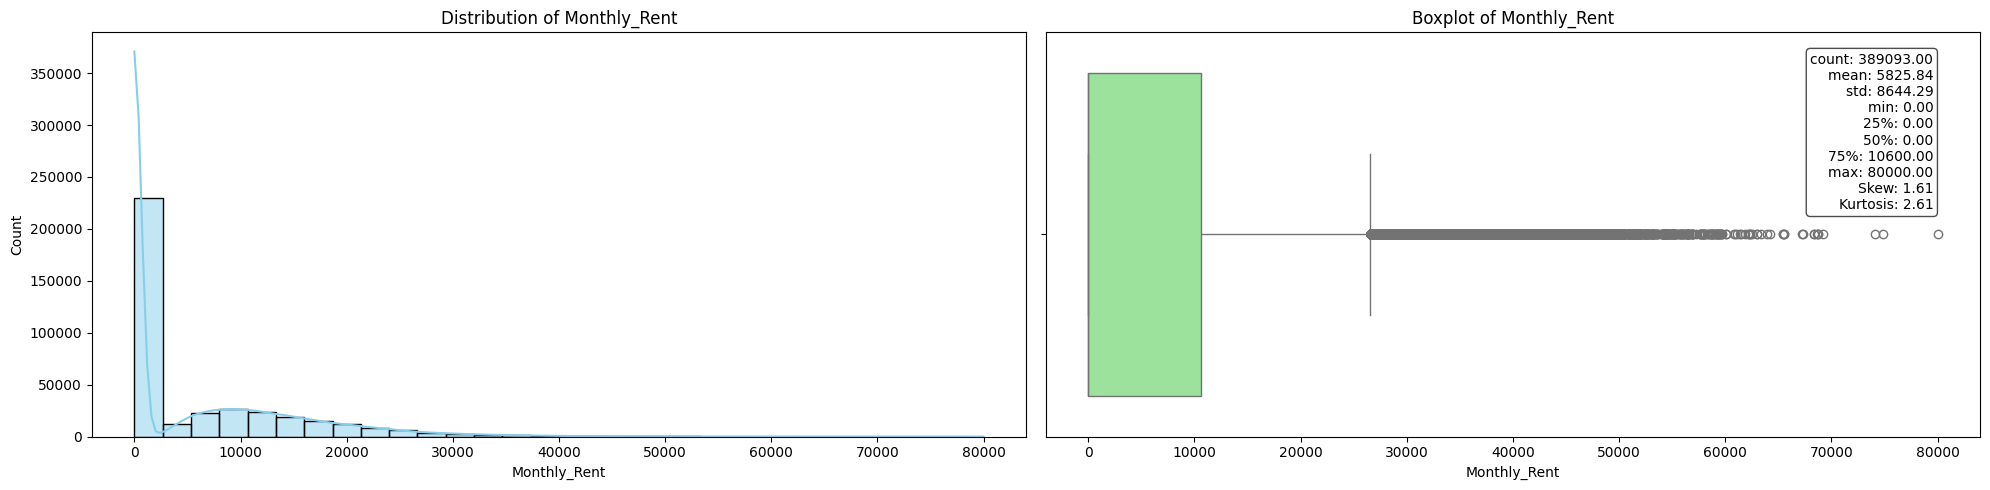

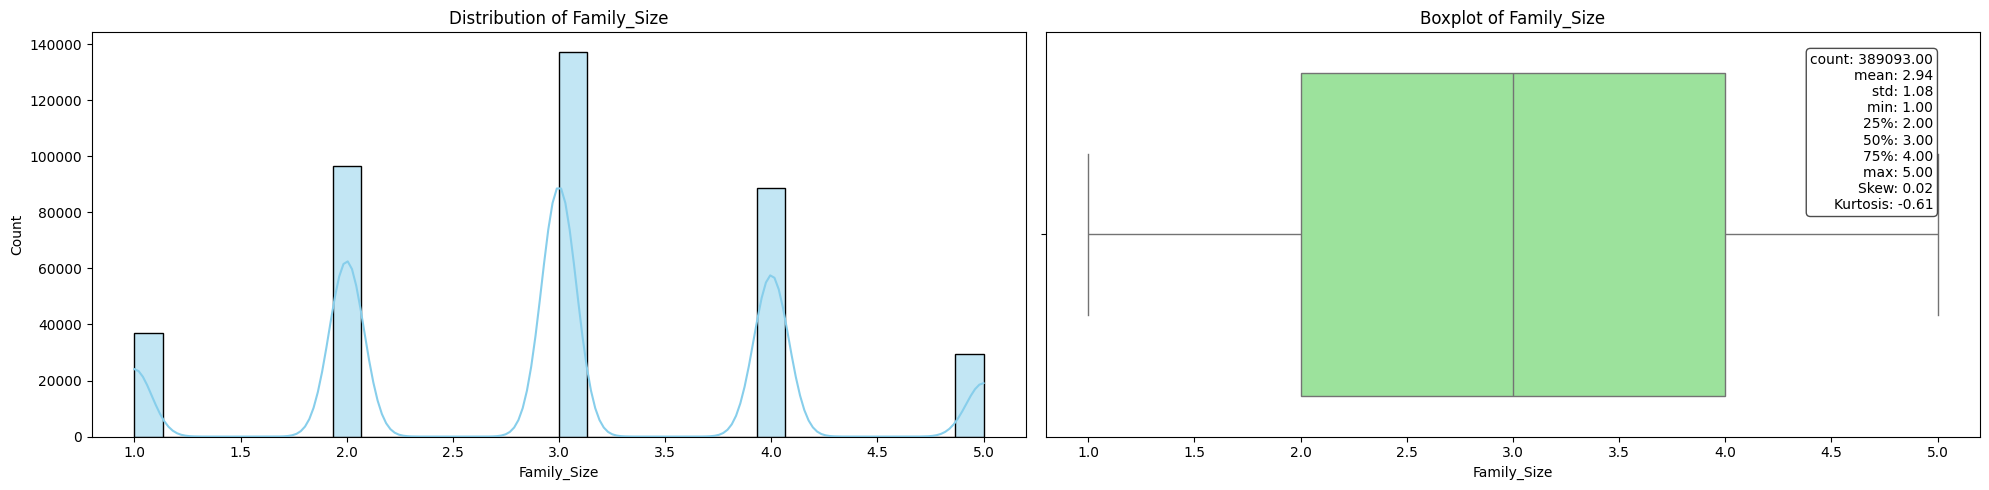

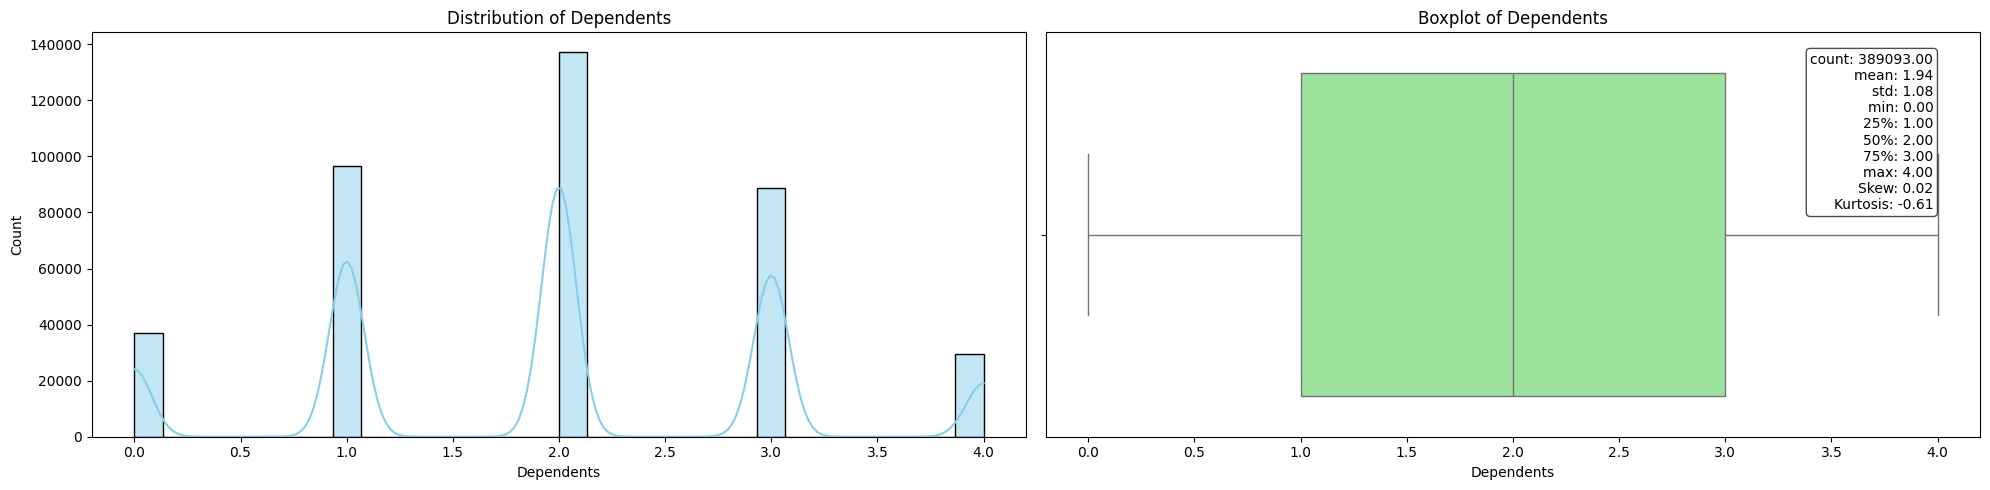

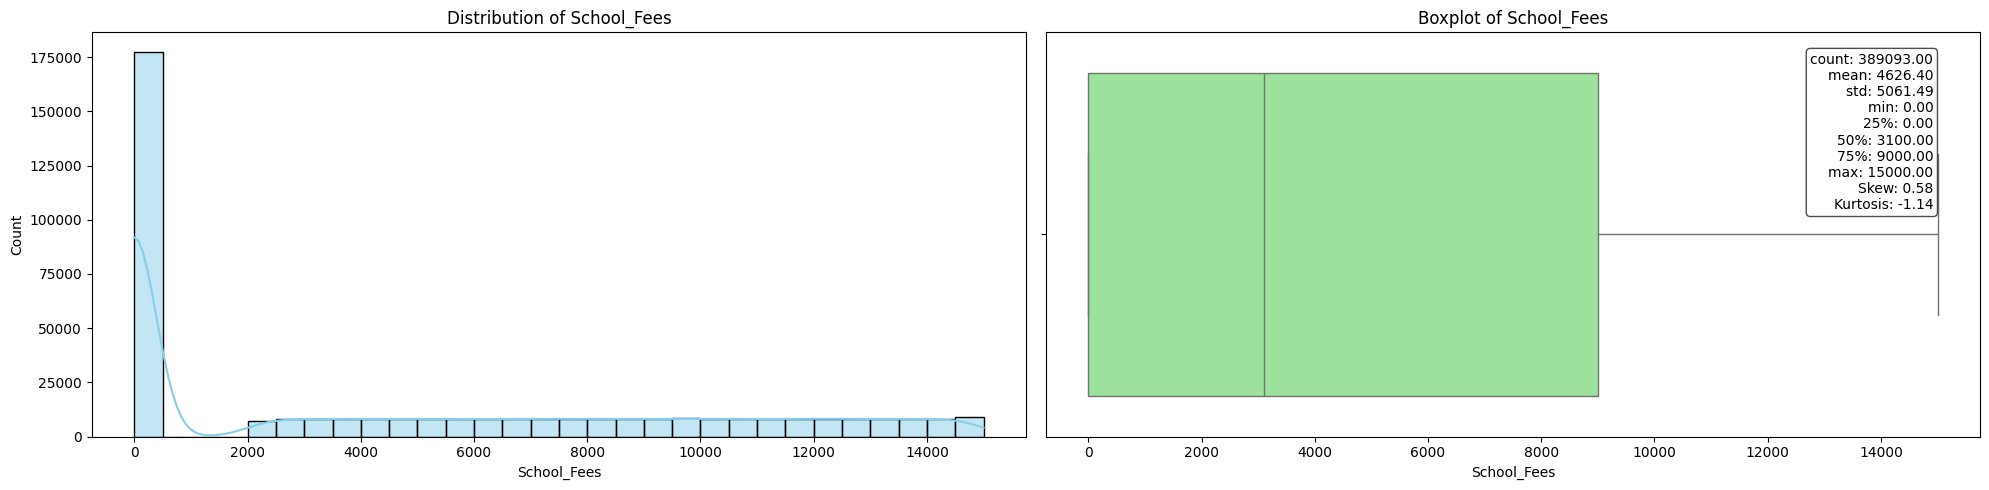

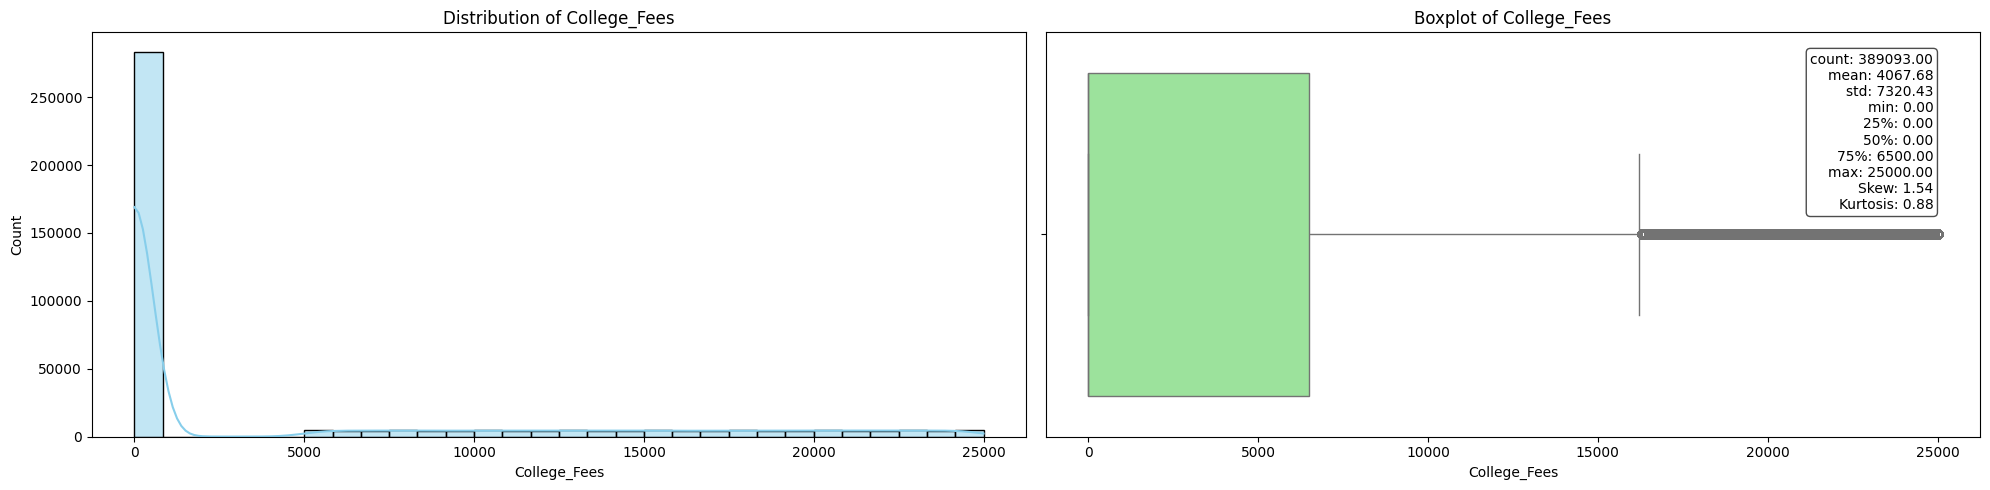

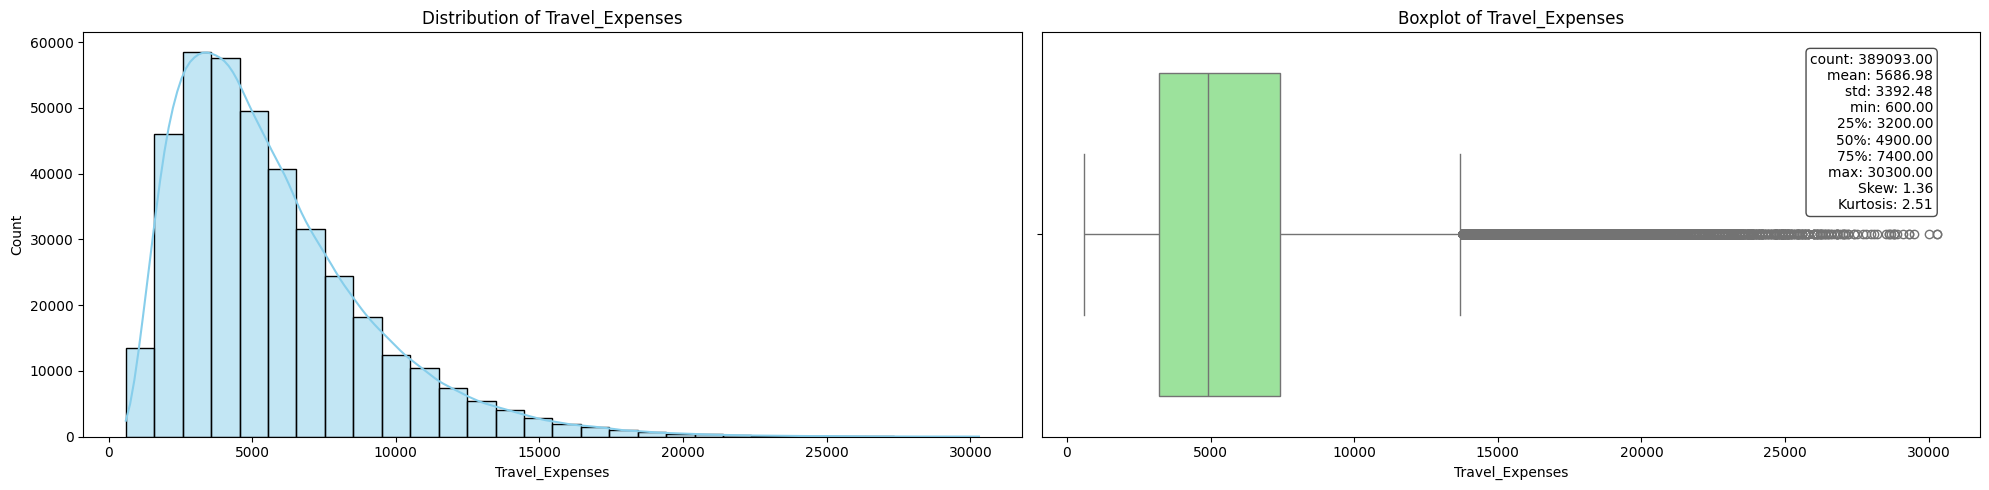

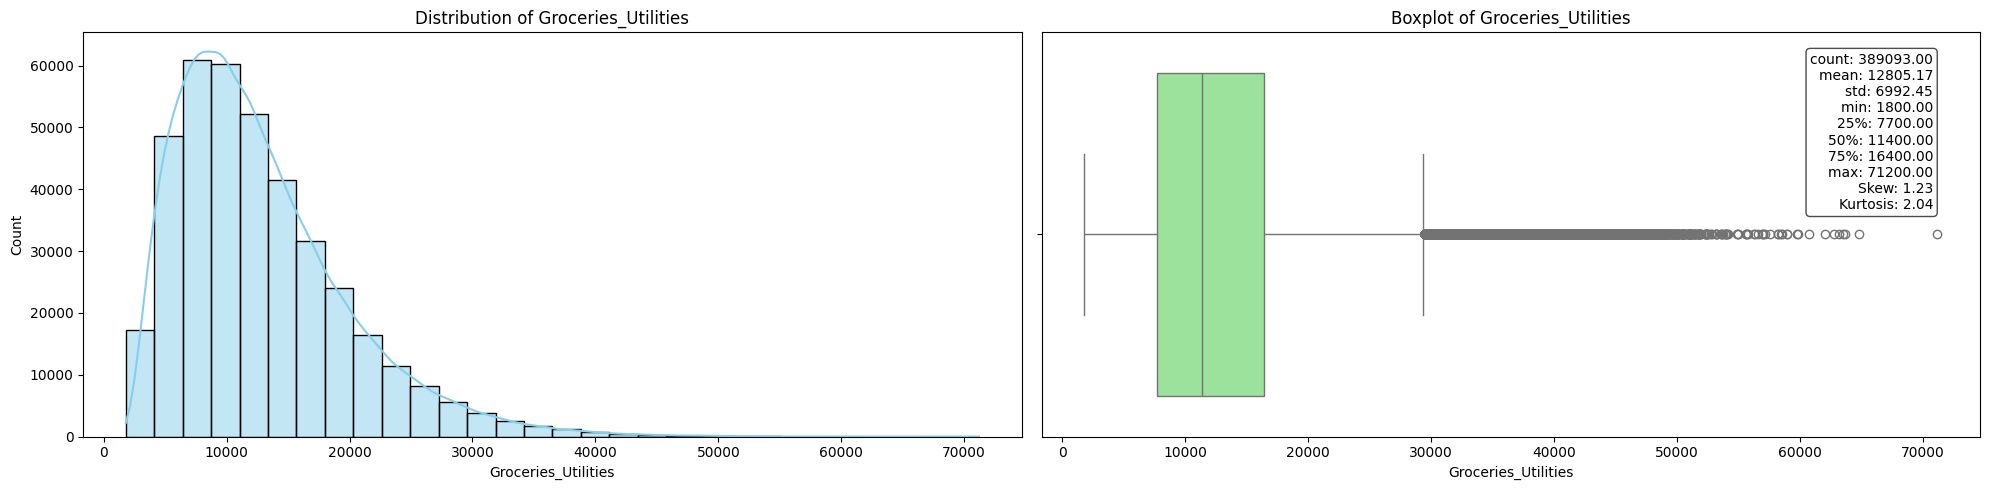

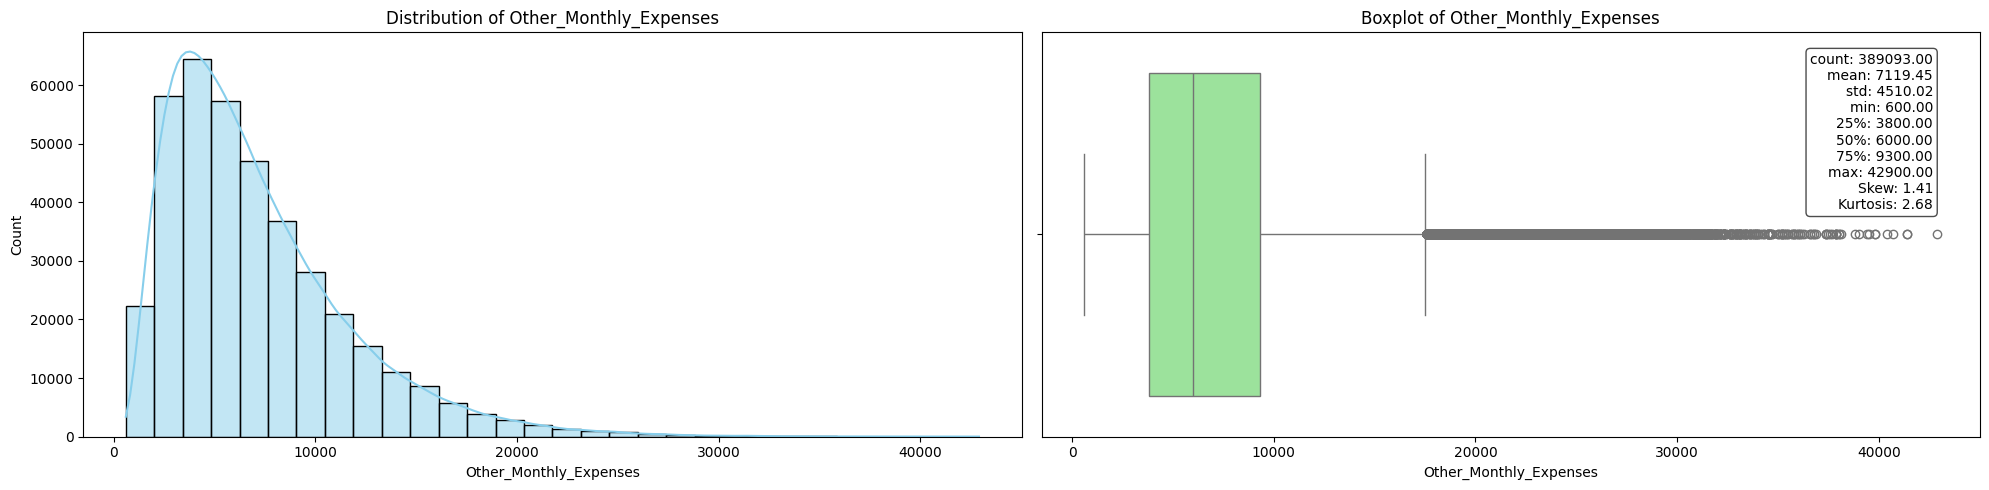

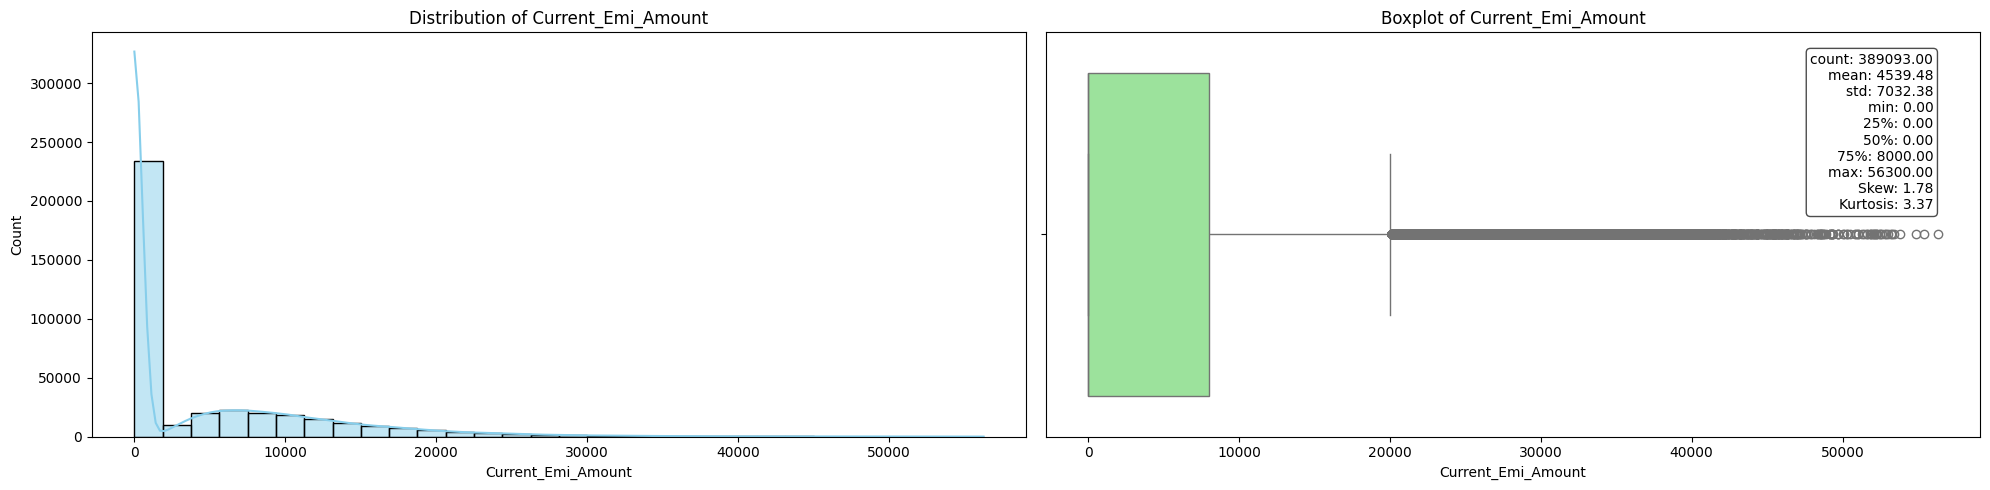

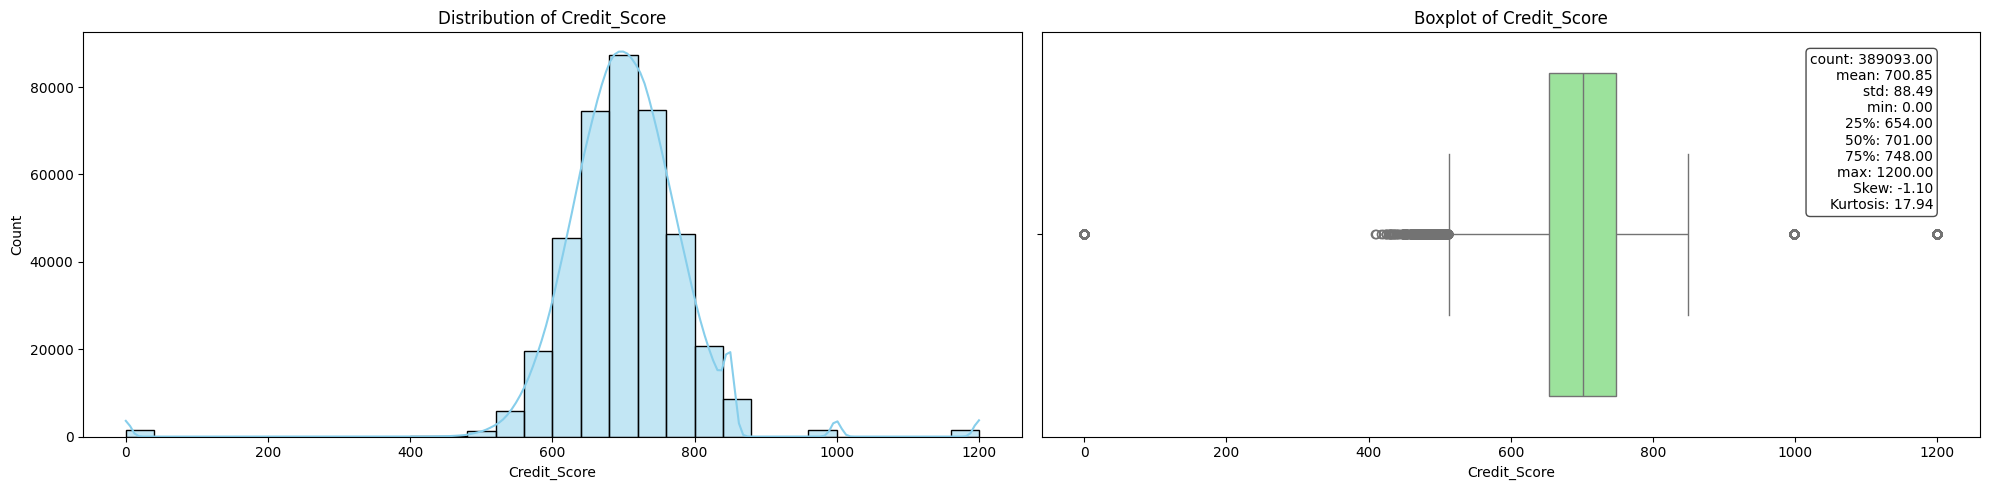

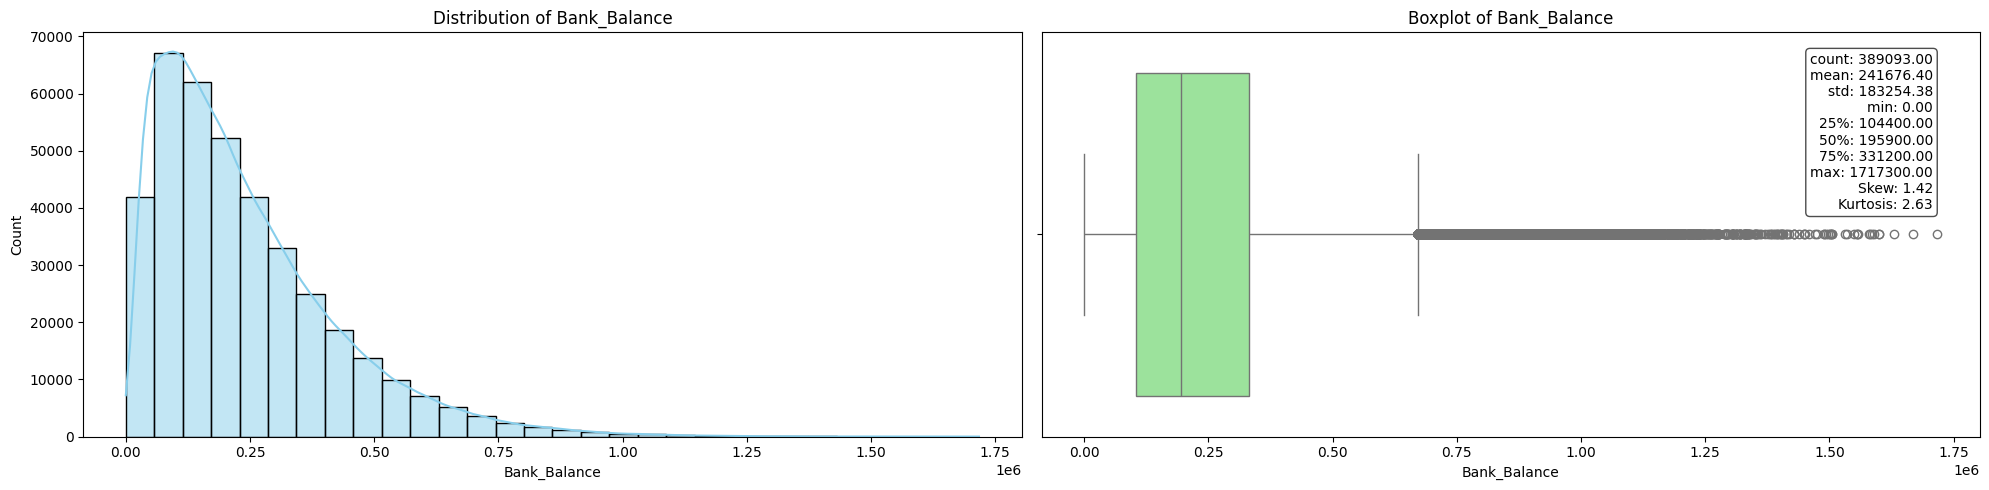

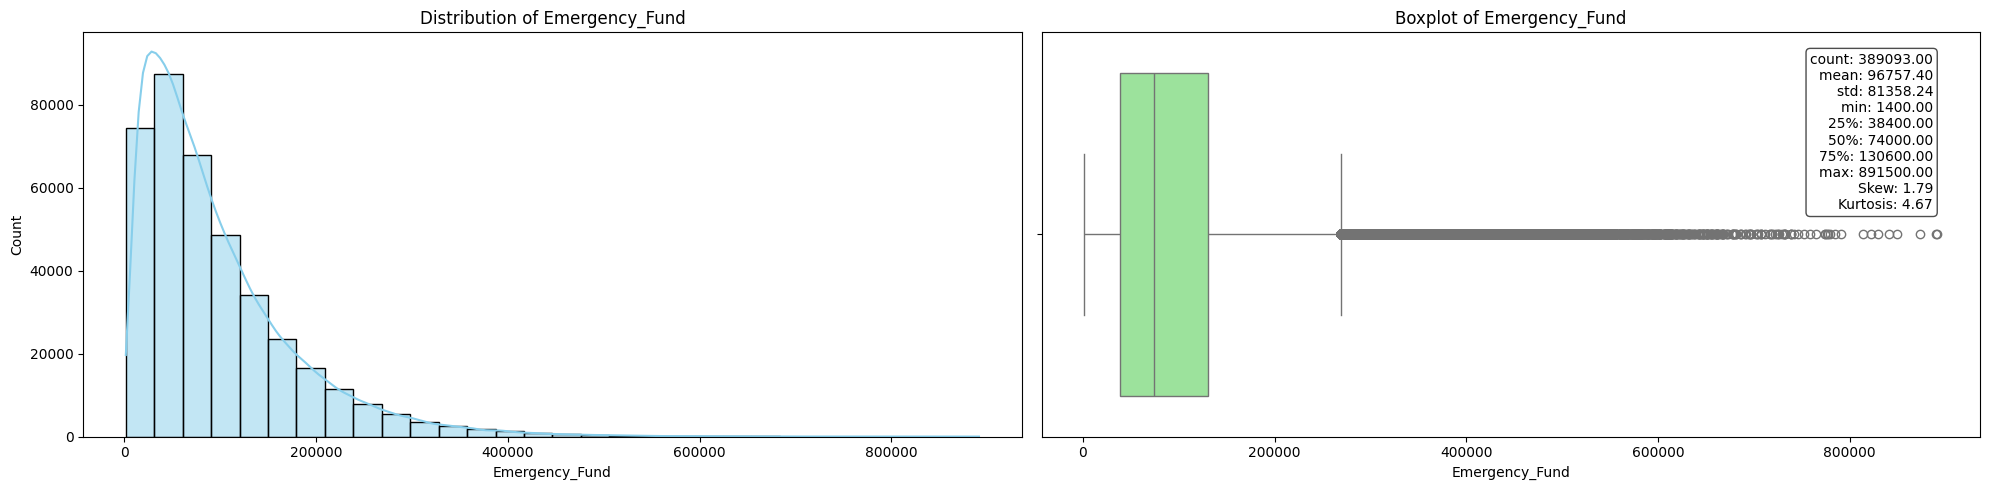

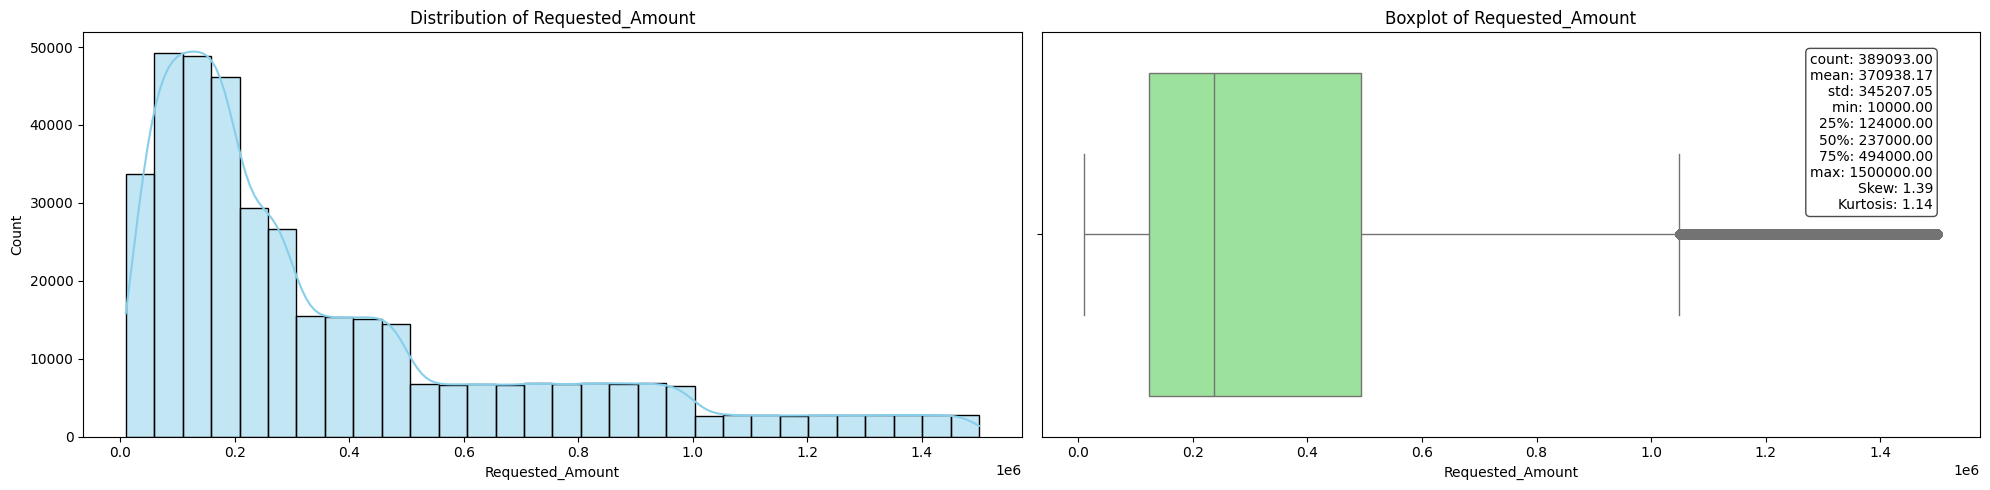

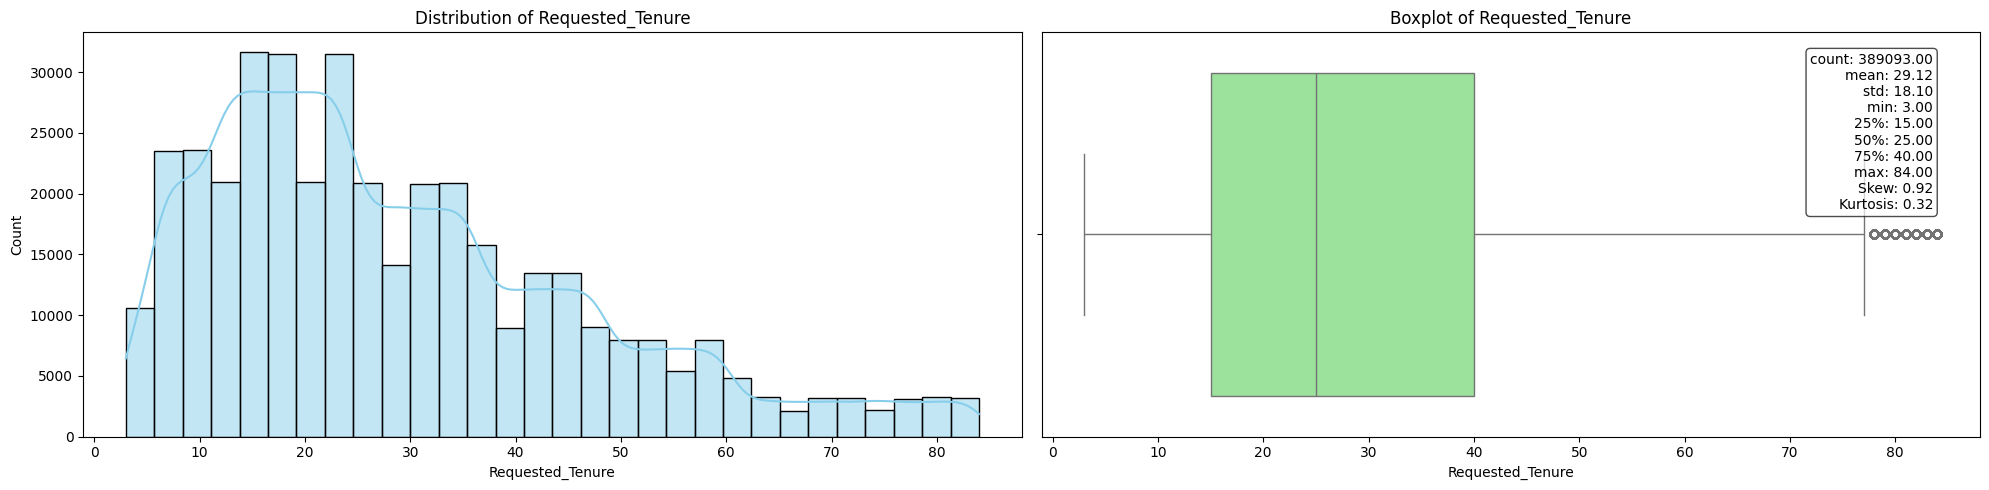

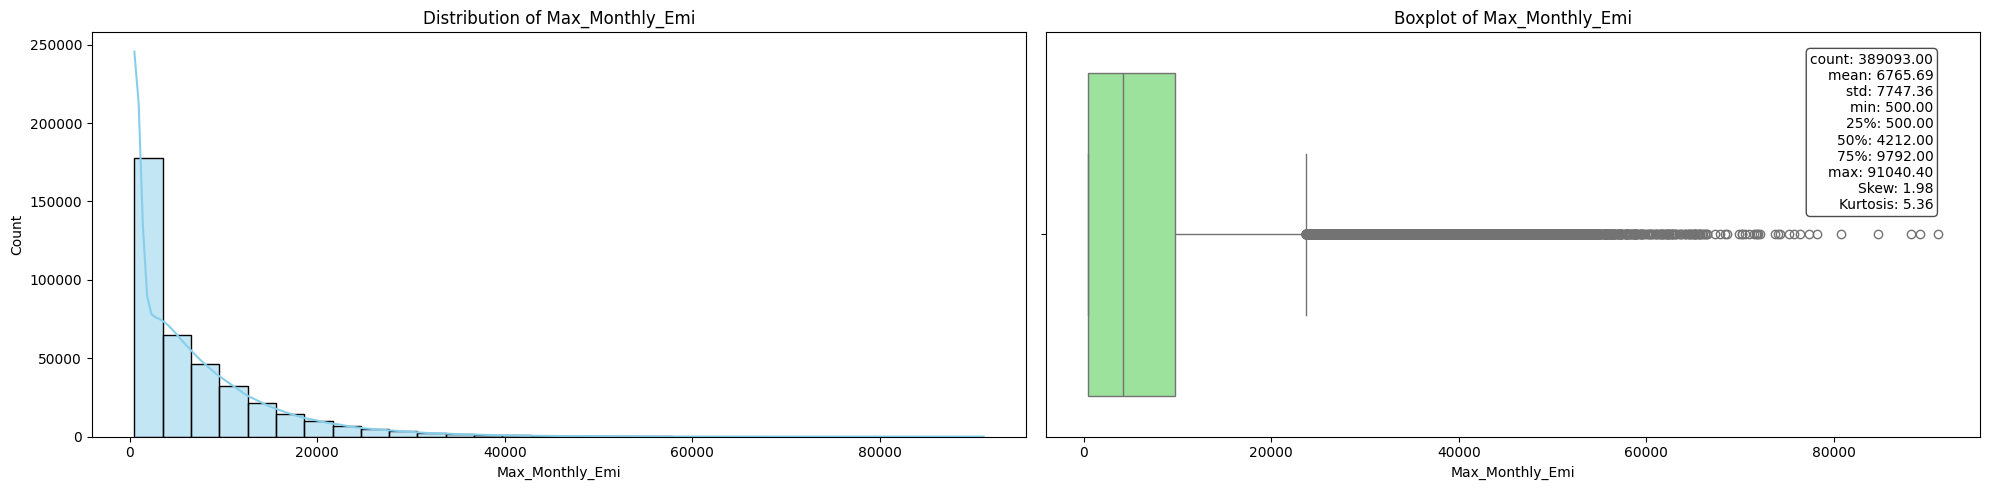

In [28]:
for col in num_cols:
    plot_numerical_feature(clean_df, col)

In [29]:
def plot_categorical_feature(df, column):
    """
    Plots univariate analysis for categorical features:
    - Bar chart (category counts)
    - Pie chart (category percentage)
    """
    series = df[column].dropna()
    counts = series.value_counts()
    percentages = counts / counts.sum() * 100

    fig, axes = plt.subplots(1, 2, figsize=(20, 5))

    # --- BAR CHART ---
    bars = axes[0].bar(counts.index, counts.values)
    axes[0].set_title(f"Frequency of {column}")
    axes[0].set_xlabel(column)
    axes[0].set_ylabel("Count")
    axes[0].tick_params(axis='x')

    # Add count labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        axes[0].annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 4), textcoords="offset points", ha='center', va='bottom')

    # --- PIE CHART ---
    explode = [0.1 if i == 0 else 0 for i in range(len(counts))]  
    axes[1].pie(percentages, labels=counts.index, autopct='%2.2f%%', startangle=90, explode=explode, shadow=True)
    axes[1].set_title(f"Percentage Distribution of {column}")
    axes[1].axis('equal') 

    plt.tight_layout()
    save_plot(f"{column}_distribution", folder="Univariate")
    plt.show()

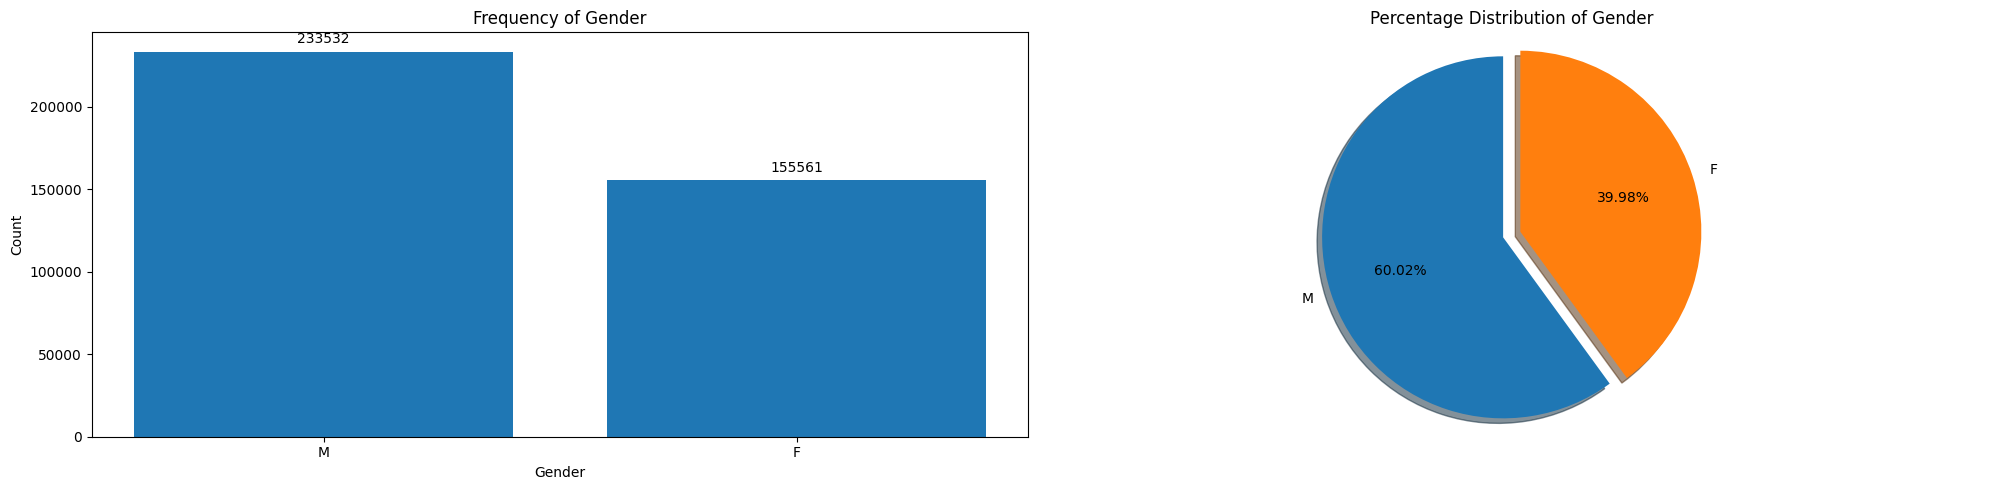

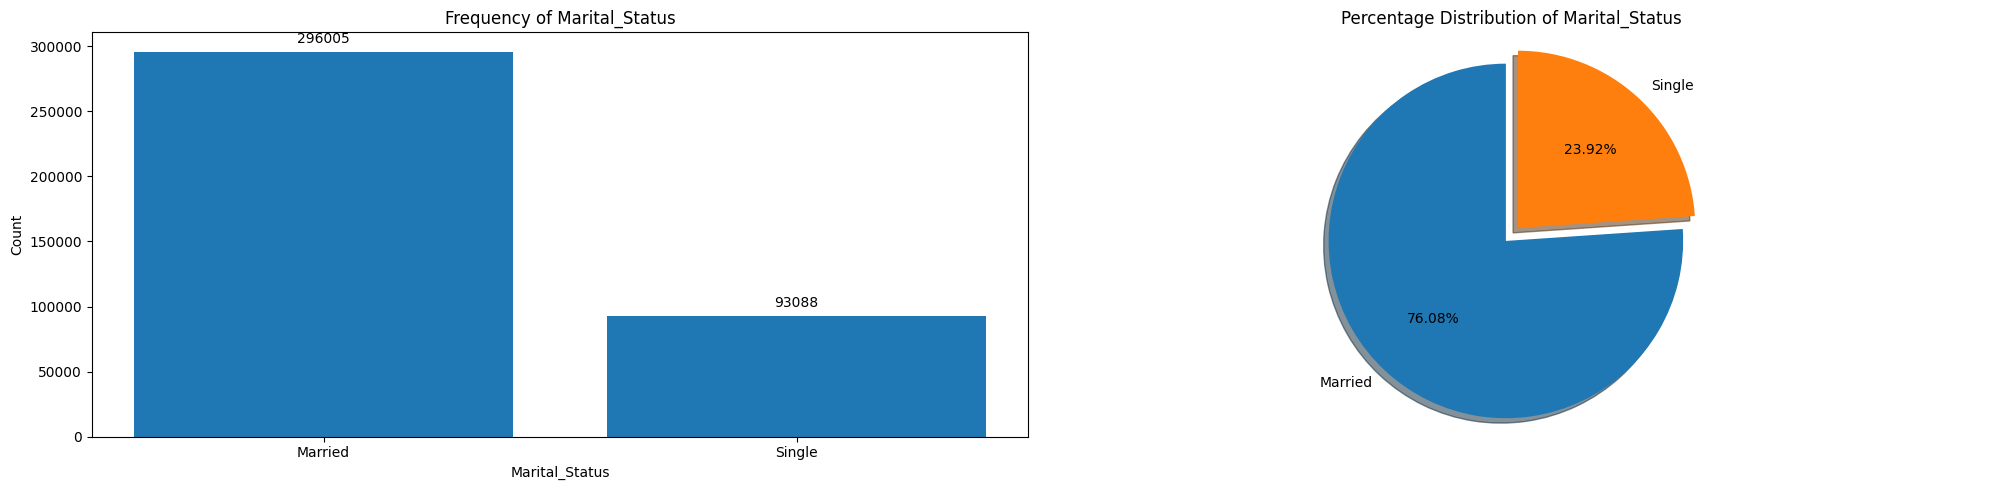

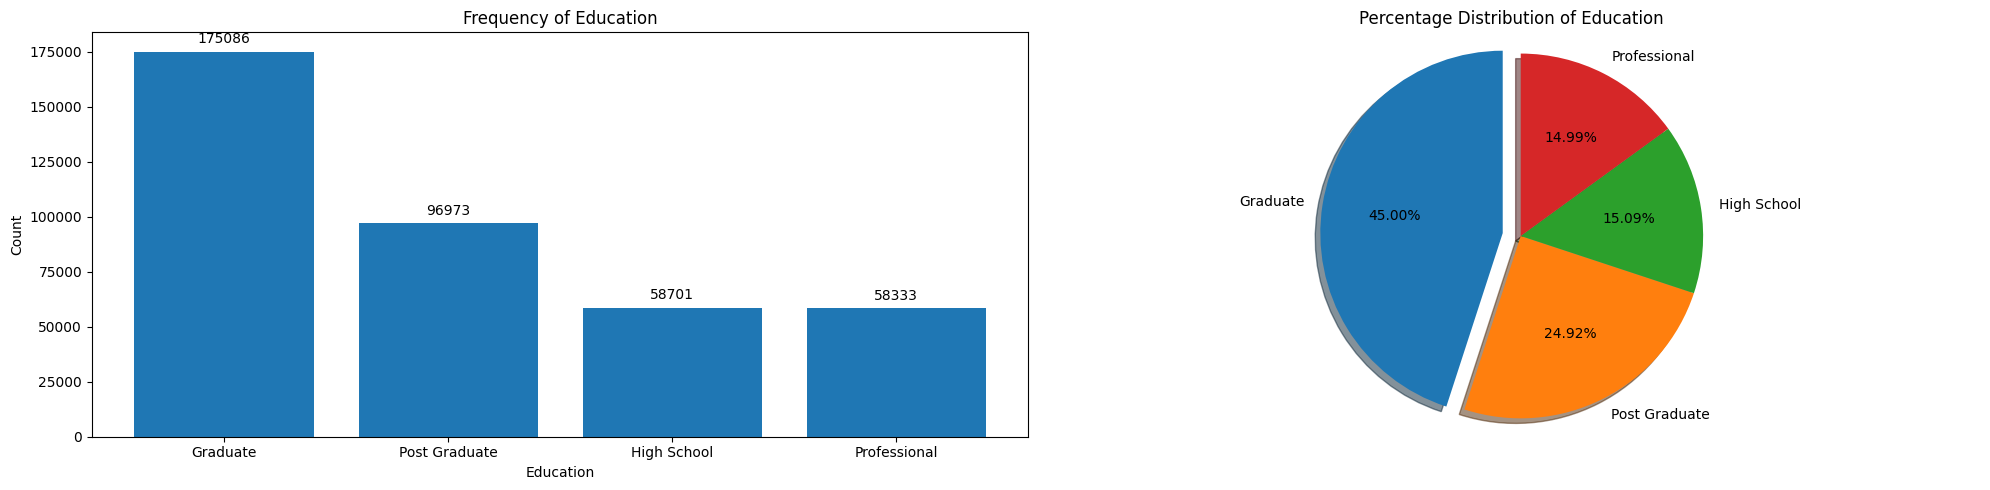

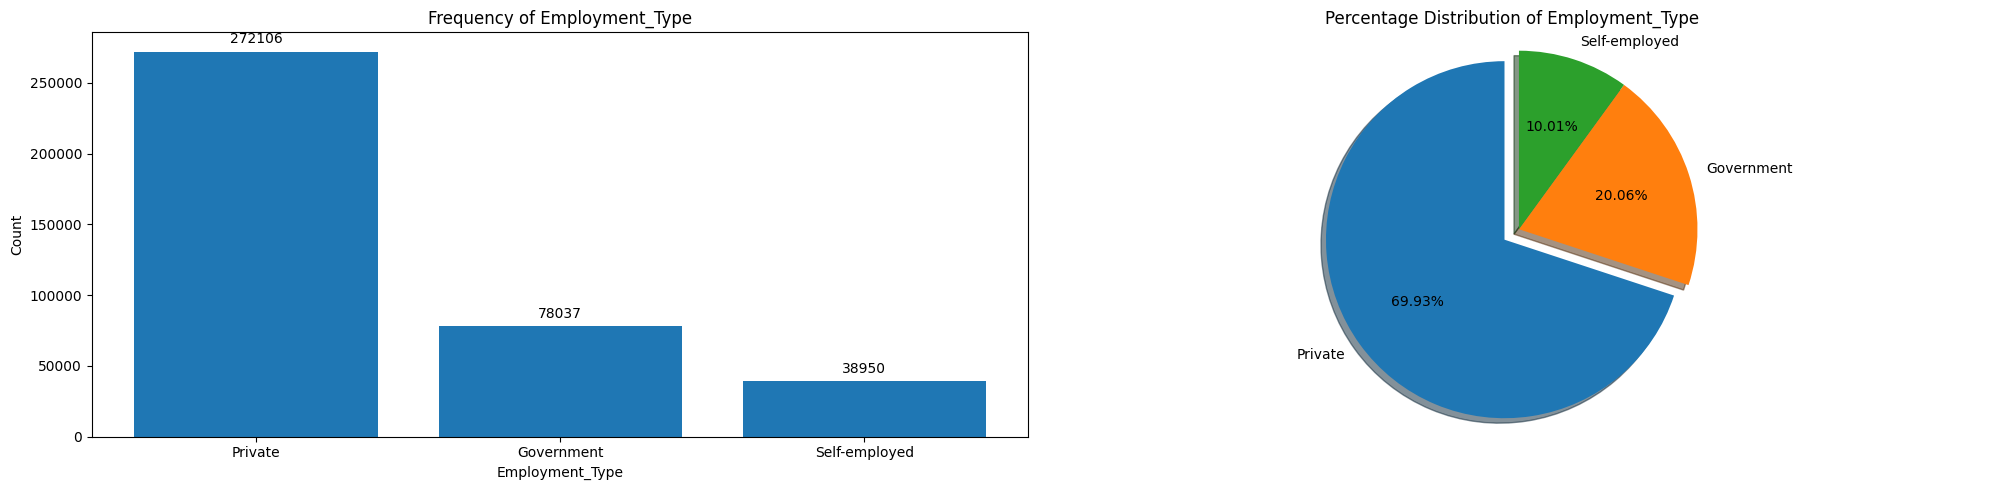

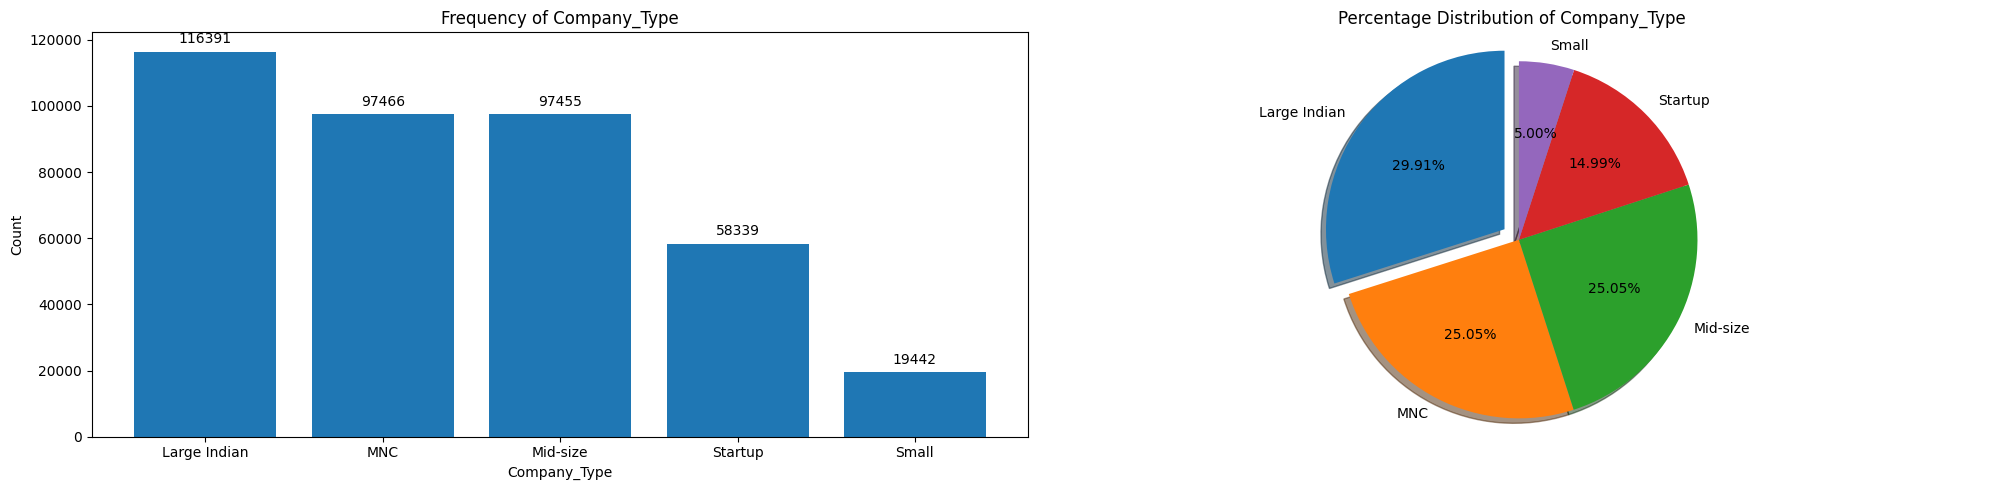

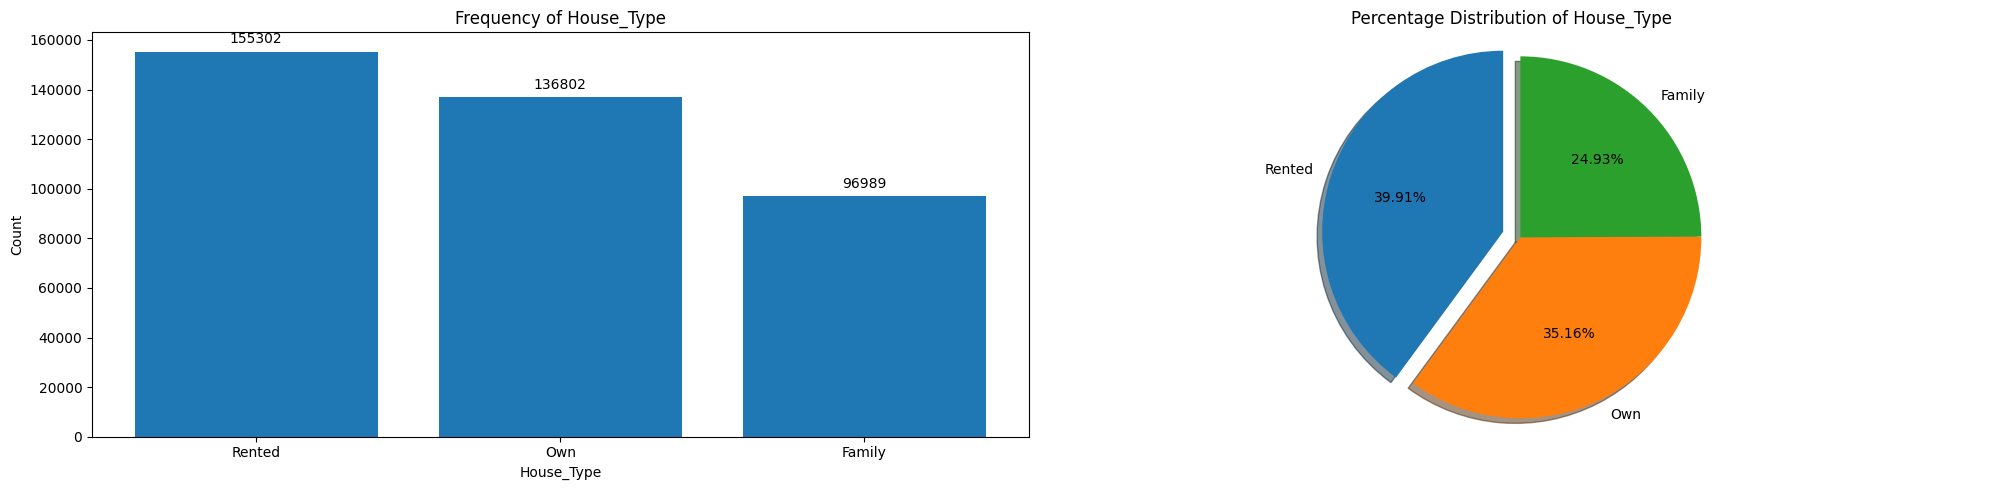

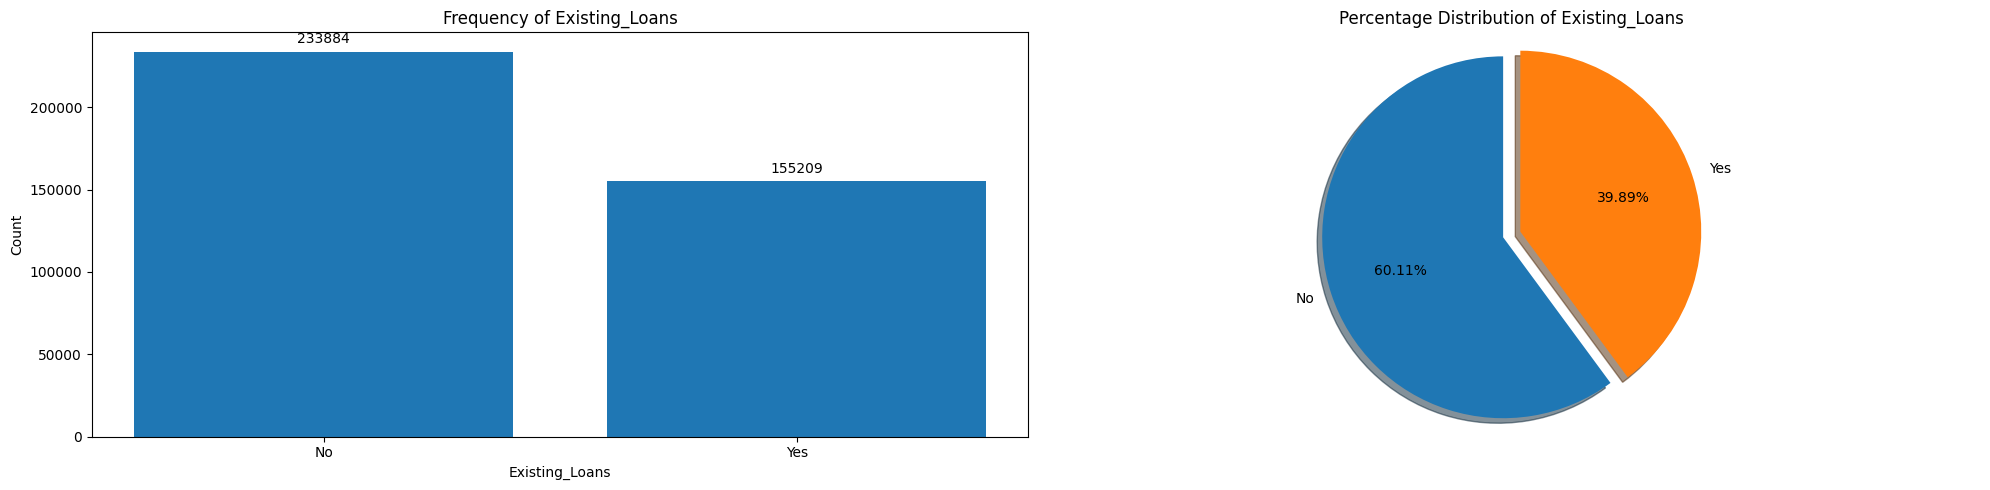

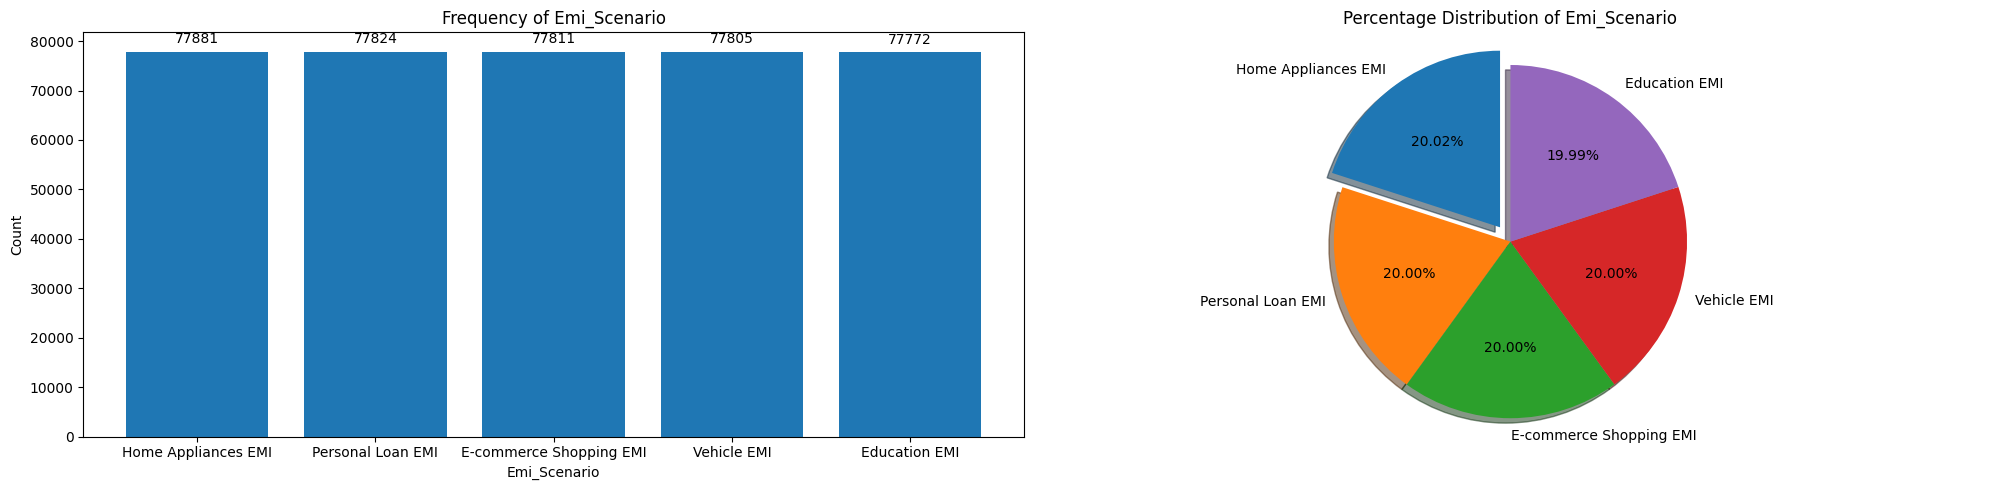

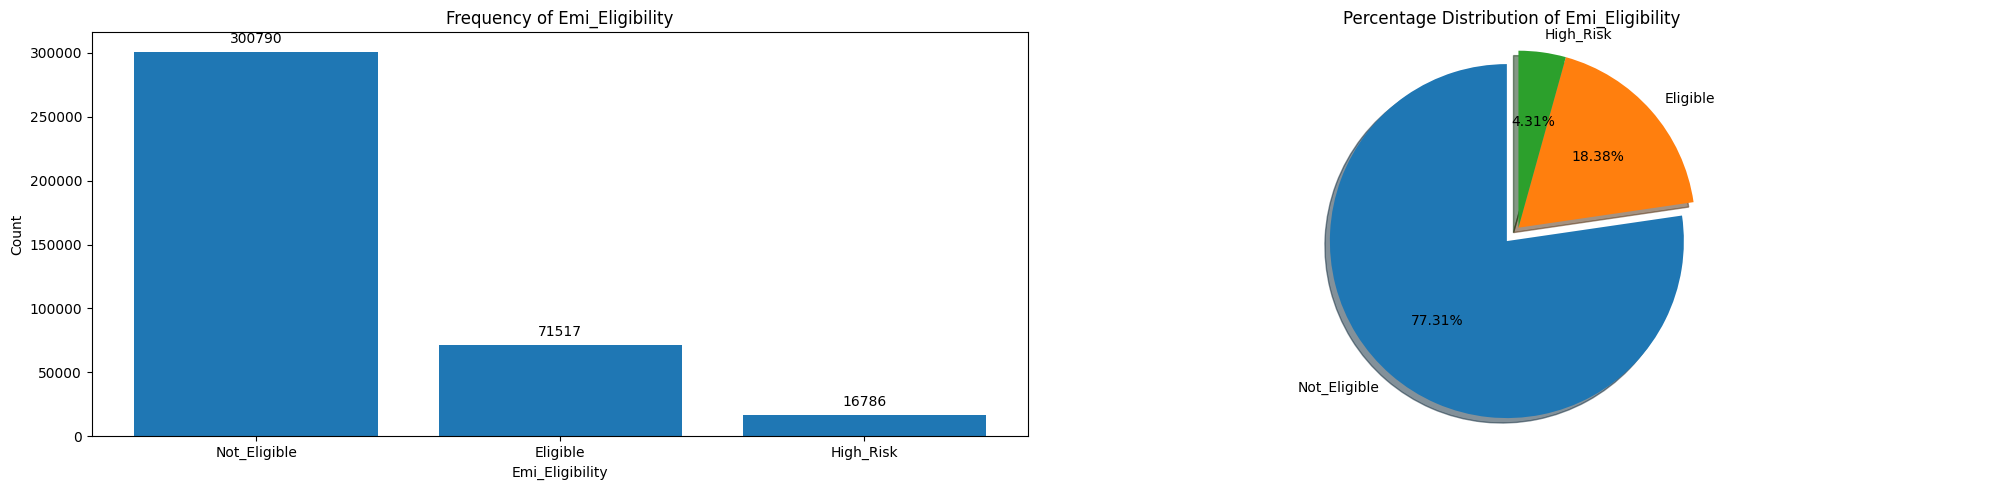

In [30]:
for col in cat_cols:
    plot_categorical_feature(clean_df, col)

#### ***Bivariate Analysis***